In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math

In [10]:
geo = gpd.read_file('data/all.json')

In [11]:
geo

,audit_task_id,label_id,gsv_panorama_id,label_type,severity,correct,high_quality_user,geometry
0,18604,85055,NjPAkwTxWsayAq3kCugvdA,CurbRamp,1.0,None,False,POINT (-122.33279 47.61860)
1,18608,85057,f_Mibt-6nJU7HTN7kx5ZGQ,Obstacle,2.0,True,False,POINT (-122.33189 47.61781)
2,18608,85059,f_Mibt-6nJU7HTN7kx5ZGQ,CurbRamp,1.0,None,False,POINT (-122.33183 47.61751)
3,18608,85060,f_Mibt-6nJU7HTN7kx5ZGQ,CurbRamp,1.0,None,False,POINT (-122.33188 47.61752)
4,18608,85062,f_Mibt-6nJU7HTN7kx5ZGQ,CurbRamp,1.0,None,False,POINT (-122.33205 47.61764)
...,...,...,...,...,...,...,...,...
195539,76181,231270,R-sTl5O6sOdVPurgTWy3EQ,CurbRamp,1.0,None,True,POINT (-122.26726 47.54077)
195540,76183,231285,N5MrAAtHZO2JGXUrYAYnSQ,NoSidewalk,5.0,None,True,POINT (-122.26344 47.55229)
195541,76193,231338,d3oBrJ-nDtKMwlE7svc6pg,CurbRamp,1.0,None,True,POINT (-122.28179 47.56327)
195542,76193,231339,AOIBJ12BjFanDJF1Ark05Q,CurbRamp,1.0,None,True,POINT (-122.28165 47.56347)


In [12]:
geo = geo.drop(columns=['gsv_panorama_id'])

In [6]:
meta = pd.read_json('data/cvMetadata.json')

In [7]:
meta

,label_id,gsv_panorama_id,label_type_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch
0,85053,3sAn6u8bQPVW3hTDfNUP1w,1,0,0,0,16384.0,8192.0,2484,-390,720,480,62,232,1,107.750000,-15.625000,270.675171,0.168884
1,85004,CpU83mS7vz17EnE02JGOkg,1,0,0,0,16384.0,8192.0,394,-389,720,480,149,254,1,41.750000,-10.375000,129.873657,0.026001
2,85024,RDV4HddwNqwfBZndZRqqkA,1,0,0,0,16384.0,8192.0,3867,-135,720,480,386,187,1,100.437500,-12.625000,128.847916,0.042198
3,85025,NpkOF1LfE024Ks0XIhCttw,1,0,1,0,13312.0,6656.0,5484,-295,720,480,435,222,1,136.062500,-11.500000,350.971405,1.353600
4,85034,-l9SjmKbZmUfr3JV3PuTVg,1,1,0,0,13312.0,6656.0,7887,-504,720,480,584,247,1,180.312500,-15.562500,171.933517,-0.698708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195539,96388,Ek8nn67kKNgCFjZkKf9ISA,7,0,0,0,16384.0,8192.0,12898,-166,720,480,364,259,2,348.645081,-3.973214,318.706665,0.226311
195540,122316,6U9DDI4UppbHDTyp8_J3JA,2,2,0,0,16384.0,8192.0,13246,-636,720,480,327,145,1,3.171875,-32.000000,186.167953,0.891960
195541,122337,lydaO-3xUm3YPy2sNPyPoQ,4,2,0,0,16384.0,8192.0,10316,-614,720,480,302,220,1,288.500000,-20.250000,181.292786,5.152237
195542,122341,ubr500pdt0vImqg71_dHsQ,1,1,0,0,16384.0,8192.0,7437,-322,720,480,377,148,1,198.312500,-23.562500,180.803787,3.150978


In [13]:
meta = meta.drop(columns=['label_type_id'])

In [14]:
labels = pd.merge(geo, meta, on='label_id')

<AxesSubplot: >

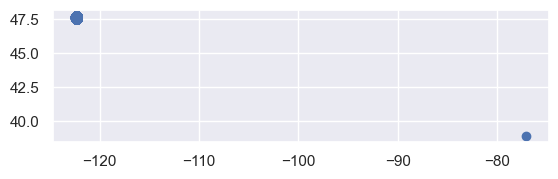

In [18]:
labels.plot()

In [19]:
labels =labels[labels['geometry'].x < -120]

In [21]:
# save the data as a geojson file
labels.to_file('data/labels.geojson', driver='GeoJSON')

In [22]:
# ground truth dataset
gt = pd.read_csv('data/jon-mikey-validated-labels-seattle.csv')

In [24]:
gt

,label_id,mikey_validated,jon_validated
0,9,f,t
1,12,f,t
2,20,f,t
3,22,f,t
4,23,f,t
...,...,...,...
12866,232967,t,f
12867,232968,t,f
12868,232969,t,f
12869,232974,t,f


In [27]:
id_list= gt['label_id'].unique().tolist()
gt_labels = labels[labels['label_id'].isin(id_list)]

In [28]:
gt_labels

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,geometry,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch
135,19418,86788,SurfaceProblem,2.0,True,False,POINT (-122.28125 47.69831),BpVD1H9f1A6URlrjPUcyZg,2,0,0,13312.0,6656.0,5686,-209,720,480,155,237,1,183.062500,-7.125000,358.678406,6.516869
457,21038,91037,CurbRamp,NaN,True,True,POINT (-122.31625 47.55795),g0kskJSQVRkZXwH8mmA3gA,1,0,0,16384.0,8192.0,1477,-902,720,480,392,173,1,34.062500,-35.000000,99.724670,-2.702782
635,22195,93842,CurbRamp,1.0,True,True,POINT (-122.32889 47.59998),npPLy6aGDOcUNgSXA4sq8Q,1,0,0,16384.0,8192.0,6495,-297,720,480,361,170,1,175.187500,-19.250000,299.396454,2.216354
653,47238,190528,CurbRamp,1.0,True,True,POINT (-122.33860 47.69603),KIOwpToFQQi4QK6hxq2Jjg,1,0,0,16384.0,8192.0,1696,-659,720,480,448,255,1,31.437500,-16.187500,132.761383,-1.222160
654,47291,190672,CurbRamp,1.0,True,True,POINT (-122.28343 47.54610),00WCIfeoGC33NDp8s0_KGg,1,0,0,16384.0,8192.0,12331,-747,720,480,336,306,2,335.875000,-15.803572,180.815201,0.315163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195175,16991,80049,CurbRamp,1.0,True,True,POINT (-122.28789 47.52785),rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,4131,-496,720,480,469,215,1,94.750000,-18.437500,178.104111,2.727684
195176,16991,80051,CurbRamp,1.0,True,True,POINT (-122.28797 47.52796),rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,643,-591,720,480,384,291,1,13.187500,-8.375000,178.104111,2.727684
195256,17700,82303,CurbRamp,3.0,None,True,POINT (-122.29849 47.54032),eYuHkS8M4C_6rWOXE1MAOw,1,1,0,16384.0,8192.0,6872,-1581,720,480,338,316,1,190.875000,-31.625000,75.978729,-1.196411
195318,18083,83398,CurbRamp,NaN,True,False,POINT (-122.37522 47.53018),9HbBPwLAbnJ57f3Iv0Sl9A,1,0,0,16384.0,8192.0,2818,-593,720,480,145,237,2,93.035713,-17.678572,201.913620,0.383842


In [29]:
# save the data as a geojson file
gt_labels.to_file('data/gt_labels.geojson', driver='GeoJSON')

In [3]:
#read in the geojson file
attributes = gpd.read_file('data/attributesWithLabels.json')

In [3]:
attributes.drop(columns=['label_date'], inplace=True)

In [15]:
#select label_tags label_description and label_id
optional_input = attributes[['label_id', 'label_tags', 'label_description']]
optional_input

,label_id,label_tags,label_description
0,95,[ ],None
1,96,[ ],None
2,97,[ ],None
3,98,[ ],None
4,99,[ ],None
...,...,...,...
21610,233178,"[ ""fire hydrant"" ]",None
21611,233179,[ ],None
21612,233186,"[ ""sand\/gravel"" ]",None
21613,233189,[ ],None


In [19]:
#convert label_description, if None then 0 else 1
optional_input['label_description'] = optional_input['label_description'].apply(lambda x: 0 if x is None else 1)

In [17]:
#convert label_tags, if empty list then 0 else 1
optional_input['label_tags'] = optional_input['label_tags'].apply(lambda x: 0 if x == '[ ]' else 1)

In [20]:
optional_input['label_tags'].unique()

array([0, 1])

In [21]:
# read in the geojson file labels
labels = gpd.read_file('data/labels.geojson')

In [22]:
# merge the optional input with the labels, put 0 if no optional input
labels_new = pd.merge(labels, optional_input, on='label_id', how='left')

In [27]:
labels_new['label_tags'].unique()

array([0., 1.])

In [25]:
#replace NaN with 0
labels_new['label_tags'].fillna(0, inplace=True)
labels_new['label_description'].fillna(0, inplace=True)

In [26]:
labels_new

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,geometry,label_tags,label_description
0,18604,85055,CurbRamp,1.0,None,False,NjPAkwTxWsayAq3kCugvdA,0,0,0,16384.0,8192.0,3109,-189,720,480,202,180,1,107.750000,-15.62500,270.556610,0.907036,POINT (-122.33279 47.61860),0.0,0.0
1,18608,85057,Obstacle,2.0,1,False,f_Mibt-6nJU7HTN7kx5ZGQ,2,0,0,16384.0,8192.0,799,-211,720,480,247,143,1,38.375000,-21.87500,164.133438,0.335564,POINT (-122.33189 47.61781),0.0,0.0
2,18608,85059,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,4997,-229,720,480,384,124,1,131.187500,-24.50000,164.133438,0.335564,POINT (-122.33183 47.61751),0.0,0.0
3,18608,85060,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,5292,-266,720,480,437,132,1,131.187500,-24.50000,164.133438,0.335564,POINT (-122.33188 47.61752),0.0,0.0
4,18608,85062,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,10681,-1070,720,480,545,227,1,257.187500,-35.00000,164.133438,0.335564,POINT (-122.33205 47.61764),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195538,76181,231270,CurbRamp,1.0,None,True,R-sTl5O6sOdVPurgTWy3EQ,0,0,0,16384.0,8192.0,12600,-931,720,480,408,179,1,332.468750,-35.00000,215.130295,-0.157570,POINT (-122.26726 47.54077),0.0,0.0
195539,76183,231285,NoSidewalk,5.0,None,True,N5MrAAtHZO2JGXUrYAYnSQ,0,0,0,16384.0,8192.0,440,-538,720,480,646,338,3,0.890625,-11.65625,179.161057,-5.825714,POINT (-122.26344 47.55229),0.0,0.0
195540,76193,231338,CurbRamp,1.0,None,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,16384.0,8192.0,8786,-953,720,480,267,187,1,253.562500,-35.00000,177.959915,-0.962440,POINT (-122.28179 47.56327),0.0,0.0
195541,76193,231339,CurbRamp,1.0,None,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,16384.0,8192.0,5007,-819,720,480,516,171,1,110.312500,-35.00000,179.365723,-1.093400,POINT (-122.28165 47.56347),0.0,0.0


In [28]:
#create a row which caclulates the difference between heading and photographer_heading
labels_new['heading_diff'] = labels_new['heading'] - labels_new['photographer_heading']

In [29]:
#create a row which caclulates the difference between pitch and photographer_pitch
labels_new['pitch_diff'] = labels_new['pitch'] - labels_new['photographer_pitch']

<AxesSubplot: >

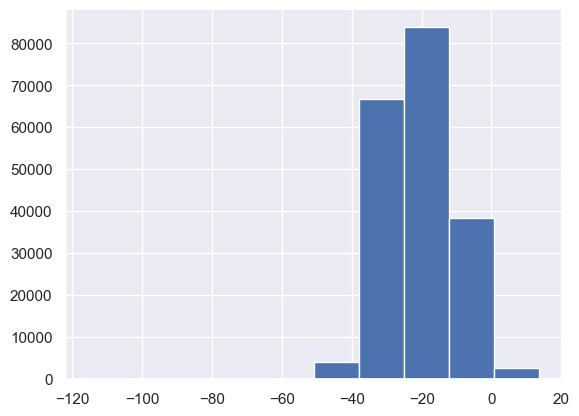

In [31]:
labels_new['pitch_diff'].hist()

<AxesSubplot: >

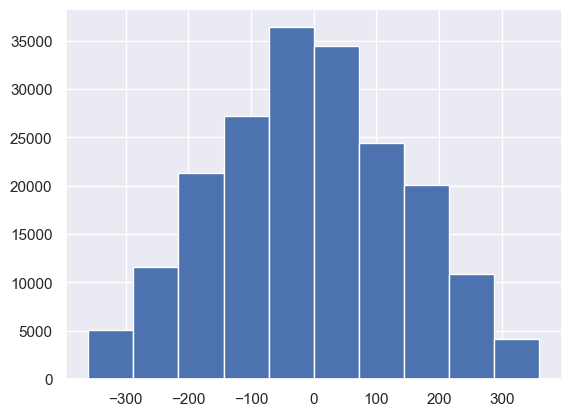

In [30]:
labels_new['heading_diff'].hist()

In [32]:
# save the data as a geojson file
labels_new.to_file('data/labels.geojson', driver='GeoJSON')

In [33]:
labels_new.to_csv('data/labels.csv', index=False)

In [7]:
# read data/labels.geojson
labels = gpd.read_file('data/labels.geojson')

In [15]:
labels

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry
0,18604,85055,CurbRamp,1.0,None,False,NjPAkwTxWsayAq3kCugvdA,0,0,0,16384.0,8192.0,3109,-189,720,480,202,180,1,107.750000,-15.62500,270.556610,0.907036,0.0,0.0,-162.806610,-16.532036,POINT (-122.33279 47.61860)
1,18608,85057,Obstacle,2.0,1,False,f_Mibt-6nJU7HTN7kx5ZGQ,2,0,0,16384.0,8192.0,799,-211,720,480,247,143,1,38.375000,-21.87500,164.133438,0.335564,0.0,0.0,-125.758438,-22.210564,POINT (-122.33189 47.61781)
2,18608,85059,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,4997,-229,720,480,384,124,1,131.187500,-24.50000,164.133438,0.335564,0.0,0.0,-32.945938,-24.835564,POINT (-122.33183 47.61751)
3,18608,85060,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,5292,-266,720,480,437,132,1,131.187500,-24.50000,164.133438,0.335564,0.0,0.0,-32.945938,-24.835564,POINT (-122.33188 47.61752)
4,18608,85062,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,10681,-1070,720,480,545,227,1,257.187500,-35.00000,164.133438,0.335564,0.0,0.0,93.054062,-35.335564,POINT (-122.33205 47.61764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195538,76181,231270,CurbRamp,1.0,None,True,R-sTl5O6sOdVPurgTWy3EQ,0,0,0,16384.0,8192.0,12600,-931,720,480,408,179,1,332.468750,-35.00000,215.130295,-0.157570,0.0,0.0,117.338455,-34.842430,POINT (-122.26726 47.54077)
195539,76183,231285,NoSidewalk,5.0,None,True,N5MrAAtHZO2JGXUrYAYnSQ,0,0,0,16384.0,8192.0,440,-538,720,480,646,338,3,0.890625,-11.65625,179.161057,-5.825714,0.0,0.0,-178.270432,-5.830536,POINT (-122.26344 47.55229)
195540,76193,231338,CurbRamp,1.0,None,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,16384.0,8192.0,8786,-953,720,480,267,187,1,253.562500,-35.00000,177.959915,-0.962440,0.0,0.0,75.602585,-34.037560,POINT (-122.28179 47.56327)
195541,76193,231339,CurbRamp,1.0,None,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,16384.0,8192.0,5007,-819,720,480,516,171,1,110.312500,-35.00000,179.365723,-1.093400,0.0,0.0,-69.053223,-33.906600,POINT (-122.28165 47.56347)


In [3]:
# read data/gt_labels.geojson
g = gpd.read_file('data/gt_labels.geojson')

In [11]:
g

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,geometry
0,19418,86788,SurfaceProblem,2.0,1,False,BpVD1H9f1A6URlrjPUcyZg,2,0,0,13312.0,6656.0,5686,-209,720,480,155,237,1,183.062500,-7.125000,358.678406,6.516869,POINT (-122.28125 47.69831)
1,21038,91037,CurbRamp,NaN,1,True,g0kskJSQVRkZXwH8mmA3gA,1,0,0,16384.0,8192.0,1477,-902,720,480,392,173,1,34.062500,-35.000000,99.724670,-2.702782,POINT (-122.31625 47.55795)
2,22195,93842,CurbRamp,1.0,1,True,npPLy6aGDOcUNgSXA4sq8Q,1,0,0,16384.0,8192.0,6495,-297,720,480,361,170,1,175.187500,-19.250000,299.396454,2.216354,POINT (-122.32889 47.59998)
3,47238,190528,CurbRamp,1.0,1,True,KIOwpToFQQi4QK6hxq2Jjg,1,0,0,16384.0,8192.0,1696,-659,720,480,448,255,1,31.437500,-16.187500,132.761383,-1.222160,POINT (-122.33860 47.69603)
4,47291,190672,CurbRamp,1.0,1,True,00WCIfeoGC33NDp8s0_KGg,1,0,0,16384.0,8192.0,12331,-747,720,480,336,306,2,335.875000,-15.803572,180.815201,0.315163,POINT (-122.28343 47.54610)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12807,16991,80049,CurbRamp,1.0,1,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,4131,-496,720,480,469,215,1,94.750000,-18.437500,178.104111,2.727684,POINT (-122.28789 47.52785)
12808,16991,80051,CurbRamp,1.0,1,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,643,-591,720,480,384,291,1,13.187500,-8.375000,178.104111,2.727684,POINT (-122.28797 47.52796)
12809,17700,82303,CurbRamp,3.0,None,True,eYuHkS8M4C_6rWOXE1MAOw,1,1,0,16384.0,8192.0,6872,-1581,720,480,338,316,1,190.875000,-31.625000,75.978729,-1.196411,POINT (-122.29849 47.54032)
12810,18083,83398,CurbRamp,NaN,1,False,9HbBPwLAbnJ57f3Iv0Sl9A,1,0,0,16384.0,8192.0,2818,-593,720,480,145,237,2,93.035713,-17.678572,201.913620,0.383842,POINT (-122.37522 47.53018)


<AxesSubplot: >

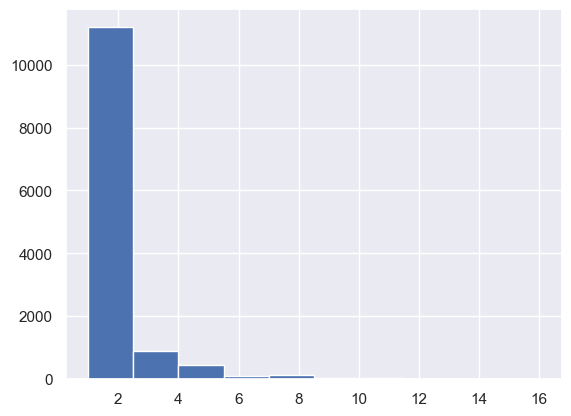

In [10]:
g['agree_count'].hist()

In [5]:
id_list= g['label_id'].unique().tolist()
gt_labels = labels[labels['label_id'].isin(id_list)]

NameError: name 'labels' is not defined

In [13]:
gt_labels

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry
135,19418,86788,SurfaceProblem,2.0,1,False,BpVD1H9f1A6URlrjPUcyZg,2,0,0,13312.0,6656.0,5686,-209,720,480,155,237,1,183.062500,-7.125000,358.678406,6.516869,0.0,0.0,-175.615906,-13.641869,POINT (-122.28125 47.69831)
457,21038,91037,CurbRamp,NaN,1,True,g0kskJSQVRkZXwH8mmA3gA,1,0,0,16384.0,8192.0,1477,-902,720,480,392,173,1,34.062500,-35.000000,99.724670,-2.702782,0.0,0.0,-65.662170,-32.297218,POINT (-122.31625 47.55795)
635,22195,93842,CurbRamp,1.0,1,True,npPLy6aGDOcUNgSXA4sq8Q,1,0,0,16384.0,8192.0,6495,-297,720,480,361,170,1,175.187500,-19.250000,299.396454,2.216354,0.0,0.0,-124.208954,-21.466354,POINT (-122.32889 47.59998)
653,47238,190528,CurbRamp,1.0,1,True,KIOwpToFQQi4QK6hxq2Jjg,1,0,0,16384.0,8192.0,1696,-659,720,480,448,255,1,31.437500,-16.187500,132.761383,-1.222160,0.0,0.0,-101.323883,-14.965340,POINT (-122.33860 47.69603)
654,47291,190672,CurbRamp,1.0,1,True,00WCIfeoGC33NDp8s0_KGg,1,0,0,16384.0,8192.0,12331,-747,720,480,336,306,2,335.875000,-15.803572,180.815201,0.315163,0.0,0.0,155.059799,-16.118734,POINT (-122.28343 47.54610)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195174,16991,80049,CurbRamp,1.0,1,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,4131,-496,720,480,469,215,1,94.750000,-18.437500,178.104111,2.727684,0.0,0.0,-83.354111,-21.165184,POINT (-122.28789 47.52785)
195175,16991,80051,CurbRamp,1.0,1,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,643,-591,720,480,384,291,1,13.187500,-8.375000,178.104111,2.727684,0.0,0.0,-164.916611,-11.102684,POINT (-122.28797 47.52796)
195255,17700,82303,CurbRamp,3.0,None,True,eYuHkS8M4C_6rWOXE1MAOw,1,1,0,16384.0,8192.0,6872,-1581,720,480,338,316,1,190.875000,-31.625000,75.978729,-1.196411,0.0,0.0,114.896271,-30.428589,POINT (-122.29849 47.54032)
195317,18083,83398,CurbRamp,NaN,1,False,9HbBPwLAbnJ57f3Iv0Sl9A,1,0,0,16384.0,8192.0,2818,-593,720,480,145,237,2,93.035713,-17.678572,201.913620,0.383842,0.0,0.0,-108.877907,-18.062414,POINT (-122.37522 47.53018)


In [14]:
# save the data as a csv file
gt_labels.to_csv('data/gt_labels.csv', index=False)

In [2]:
# read jon-mikey-validated-labels-seattle.csv
vt = pd.read_csv('data/jon-mikey-validated-labels-seattle.csv')
vt

,label_id,mikey_validated,jon_validated
0,9,f,t
1,12,f,t
2,20,f,t
3,22,f,t
4,23,f,t
...,...,...,...
12866,232967,t,f
12867,232968,t,f
12868,232969,t,f
12869,232974,t,f


In [17]:
#select jon_validated =t
jon_true = vt[vt['jon_validated'] == 't']

In [20]:
jon_true

,label_id,mikey_validated,jon_validated
0,9,f,t
1,12,f,t
2,20,f,t
3,22,f,t
4,23,f,t
...,...,...,...
12641,222498,f,t
12687,223603,f,t
12750,225126,f,t
12770,226626,f,t


In [21]:
#read in json file jonfroehlich
jon = pd.read_json('data/jonfroehlich.json')
jon

,user_id,username,audit_task_id,street_edge_id,task_start,task_end,label_id,temporary_label_id,label_type
0,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,15426,7197,1560380474910,1562969926618,75854,742,SurfaceProblem
1,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,15426,7197,1560380474910,1562969926618,73914,731,NoCurbRamp
2,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,15426,7197,1560380474910,1562969926618,75853,741,SurfaceProblem
3,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,15426,7197,1560380474910,1562969926618,73912,729,CurbRamp
4,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,15426,7197,1560380474910,1562969926618,73918,732,NoCurbRamp
...,...,...,...,...,...,...,...,...,...
965,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,48610,16482,1643765569653,1643765906074,194796,976,NoSidewalk
966,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,48610,16482,1643765569653,1643765906074,194774,957,NoSidewalk
967,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,48610,16482,1643765569653,1643765906074,194752,945,NoSidewalk
968,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,48610,16482,1643765569653,1643765906074,194776,959,NoSidewalk


In [22]:
#select only the label_id and create new dataframe
jon = jon[['label_id']]

In [28]:
#check if label_id in jon all is in jon_true and create new dataframe
jon_true = jon_true[jon_true['label_id'].isin(jon['label_id'])]
jon_true

,label_id,mikey_validated,jon_validated
6338,76344,f,t


In [26]:
#sort by jon_validated
jon_all.sort_values(by=['jon_validated'], inplace=True)

In [27]:
jon_all

,label_id,mikey_validated,jon_validated
132,76344,f,t
0,75854,NaN,NaN
1,73914,NaN,NaN
2,75853,NaN,NaN
3,73912,NaN,NaN
...,...,...,...
965,194796,NaN,NaN
966,194774,NaN,NaN
967,194752,NaN,NaN
968,194776,NaN,NaN
